In [ ]:
%matplotlib widget

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from numba import njit
import scipy.interpolate

In [2]:
fixed_value = 1.8e-11

m_6052 = -97e-15
q_6052 = 6.2e-13
r2_6052 = 3.5e-26

m_6194 = -59e-15
q_6194 = 4.1e-13
r2_6194 = 0.8e-26

m_7221 = -3.4e-15
q_7221 = 2.8e-13
r2_7221 = 0.2e-26

m_7392 = -10e-15
q_7392 = 5.3e-13
r2_7392 = 0.4e-26

In [3]:
with open("colimator-scans-data.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
with open("colimator-scans-details.pkl", "rb") as f:
    details = pickle.load(f)

# Grab some beam data properly

In [5]:
details[6052]["beam1"]["horizontal"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 40],
 'measuredEmittance': 3.5,
 'nominalBeamSizeUM': 280,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_C6_L7_B1.csv',
 'movingJaw': 'TCP.C6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.C6L7.B1:MEAS_LVDT_RU'}

In [6]:
details[6052]["beam1"]["vertical"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 51],
 'measuredEmittance': 4.0,
 'nominalBeamSizeUM': 200,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv',
 'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'}

In [7]:
data[6052]["TCP_IR7_B1H"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.C6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.C6R7.B2:MEAS_LVDT_LU'])

In [8]:
data[6052]["TCP_IR7_B1V"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.D6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.D6R7.B2:MEAS_LVDT_LU'])

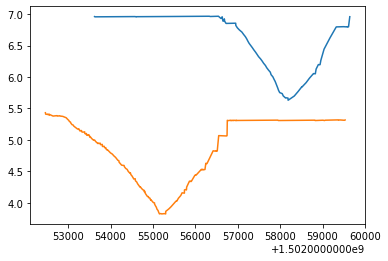

In [9]:
plt.plot(
    data[6052]["TCP_IR7_B1H"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1H"]["lowres"]["TCP.C6L7.B1:MEAS_LVDT_LU"] / 0.28,
)

# plt.plot(
#     data[6052]["TCP_IR7_B1H"]["lowres"]["timestamps"],
#     data[6052]["TCP_IR7_B1H"]["lowres"]["TCP.C6R7.B2:MEAS_LVDT_LU"] / 0.28,
# )

plt.plot(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
)

# plt.plot(
#     data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
#     data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6R7.B2:MEAS_LVDT_LU"] / 0.28,
# )


In [10]:
data[6052]["TCP_IR7_B1V"]["hires"].keys()

dict_keys(['BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09', 'BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09'])

In [11]:
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan

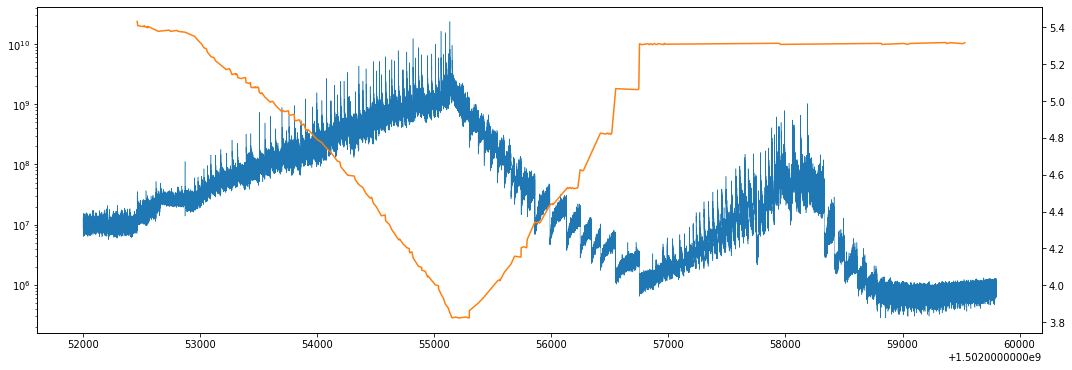

In [12]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    c="C1"
)

In [111]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.scatter(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    c="C1"
)

plt.xlim(55000+1.5020e9, 57000+1.5020e9)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1502055000.0, 1502057000.0)

In [112]:
func = scipy.interpolate.interp1d(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    kind="previous", fill_value="extrapolate"
)

In [113]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0],
    func(d[0]),
    c="C1"
)

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1502055250.0, 1502056750.0)

(1502055250.0, 1502056750.0)

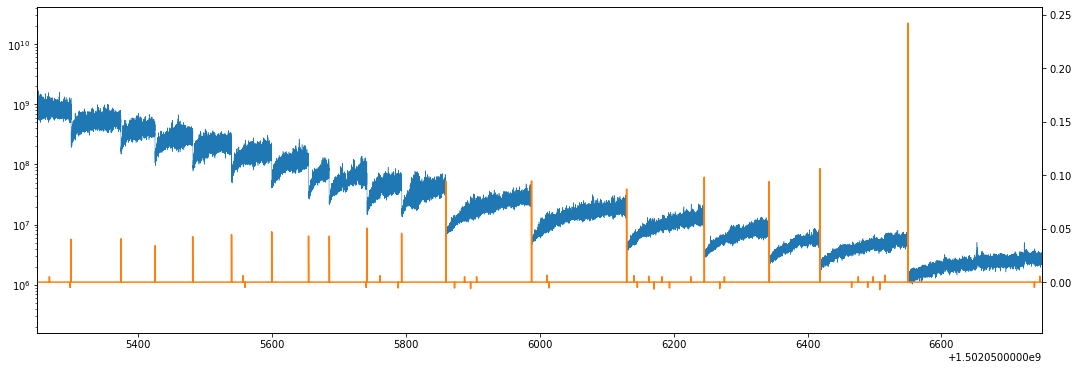

In [24]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0][:-1],
    np.diff(func(d[0])),
    c="C1"
)

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

In [40]:
diffs = np.diff(func(d[0]))
idxs = np.where(diffs > 0.01)[0]
vals = d[0][np.where(diffs > 0.01)]

In [41]:
idxs

array([329838, 337335, 342432, 348031, 353829, 359827, 365324, 368424,
       374021, 379219, 385817, 398611, 412807, 424404, 434101, 441697,
       454793, 475086])

(1502055250.0, 1502056750.0)

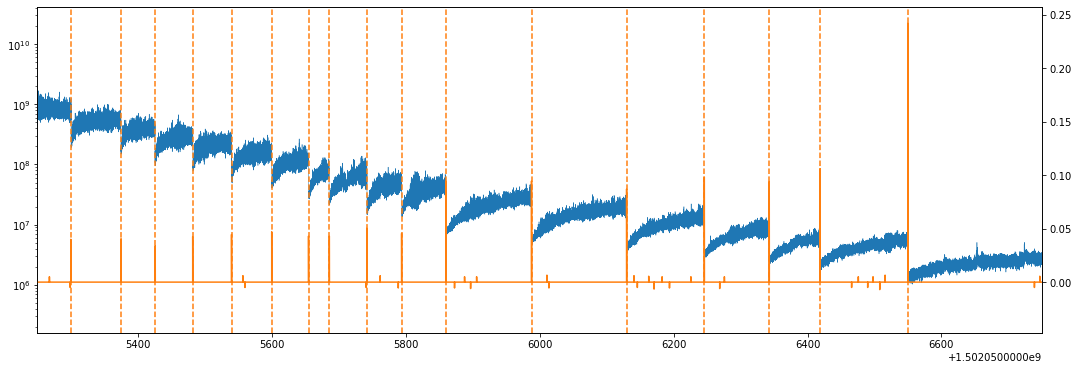

In [42]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0][:-1],
    np.diff(func(d[0])),
    c="C1"
)

for v in vals:
    plt.axvline(v, c="C1", linestyle="--")

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

In [116]:
slices = []

for i in range(len(vals) - 1):
    slices.append((
        d[0][idxs[i]: idxs[i+1]],
        d[1][idxs[i]: idxs[i+1]],
        np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
        (idxs[i], idxs[i+1])
    ))

In [117]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
for s in slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [118]:
@njit
def moving_average(a: np.ndarray, n=1) -> np.ndarray :
    out = a.copy()
    for i in range(len(a)):
        out[i] = np.nanmean(a[max(0, i-n): min(len(a), i+n+1)])
    return out

In [124]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
    plt.plot(s[0], moving_average(s[1] / fixed_value, n=30), linewidth=0.5, c="black")
plt.yscale("log")

plt.twinx()
for s in slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [120]:
slices = []

for i in range(len(vals) - 1):
    slices.append((
        d[0][idxs[i]: idxs[i+1]],
        d[1][idxs[i]: idxs[i+1]],
        np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
        (idxs[i], idxs[i+1])
    ))

In [121]:
def reset_indexes(slices, slice_val=100):
    new_slices = []
    for i, s in enumerate(slices):
        if i == 0:
            new_left = np.argmin(s[1][:slice_val]) + s[3][0]
        else:
            data = np.concatenate((
                slices[i-1][1][-slice_val:],
                slices[i][1][:slice_val]
            ))
            rel_index = np.argmin(data)
            if rel_index < slice_val:
                new_left = slices[i-1][3][1] + rel_index
            else:
                new_left = slices[i][3][0] + rel_index - slice_val
        
        if i == len(slices) - 1:
            new_right = np.argmax(s[1][-slice_val:]) + s[3][1] - slice_val
        else:
            data = np.concatenate((
                slices[i][1][-slice_val:],
                slices[i+1][1][:slice_val]
            ))
            rel_index = np.argmax(data)
            if rel_index < slice_val:
                new_right = slices[i][3][1] + rel_index - slice_val
            else:
                new_right = slices[i+1][3][0] + rel_index - slice_val

        new_slices.append((
            d[0][new_left: new_right],
            d[1][new_left: new_right],
            np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
            (new_left, new_right)
        ))
    return new_slices

            


In [122]:
new_slices = reset_indexes(slices, slice_val=50)

In [123]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in new_slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
for s in new_slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Interpolations

In [91]:
def gather_points(slices, end_sample):
    points = []
    for s in slices:
        points.append((
            s[0][-1],
            np.nanmin(s[1][-end_sample:]),
            np.nanmean(s[1][-end_sample:]),
            np.nanmax(s[1][-end_sample:]),
        ))
    return points

In [102]:
points = gather_points(new_slices, end_sample=50)
f_min = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[1] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)
f_mean = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[2] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)
f_max = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[3] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)


In [103]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in new_slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5, c="C0")

    plt.plot(s[0], f_min(s[0]) / fixed_value, c="C1")
    plt.plot(s[0], f_mean(s[0]) / fixed_value, c="C2")
    plt.plot(s[0], f_max(s[0]) / fixed_value, c="C3")

plt.yscale("log")

plt.twinx()
for s in new_slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Normalized recovery currents...

In [110]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(13, 6))


for s in new_slices[1:]:
    the_function = f_max(s[0]) / fixed_value
    plt.plot(s[0], (s[1] / fixed_value) / the_function, linewidth=0.5, c="C0")
    # plt.plot(s[0], f_min(s[0]) / fixed_value, c="C1")
    # plt.plot(s[0], f_mean(s[0]) / fixed_value, c="C2")
    plt.plot(s[0], f_max(s[0]) / fixed_value / the_function, c="C3")

plt.yscale("log")

plt.twinx()
for s in new_slices[1:]:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …